# Election 2012 Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

from __future__ import division

/Users/ryanshiz/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import requests
# Requests is a good way to download data from the internet
from StringIO import StringIO
# StringIO provides a convenient means of working with text in memory using the file API

## Polling Data Analysis

In [4]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

CSV file is a list of polls conducted throughout the 2012 election buildup. From HuffPost Pollster.

In [5]:
source = requests.get(url).text
poll_data = StringIO(source)

In [6]:
poll_df = pd.read_csv(poll_data)
del poll_df['Other']
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
2,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712,Likely Voters,Live Phone,50,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


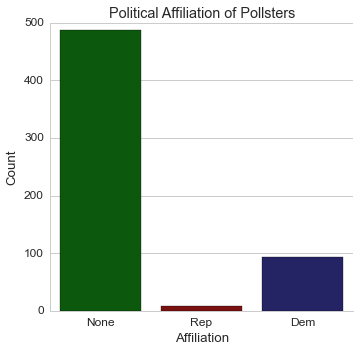

In [7]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
ax = sns.factorplot('Affiliation', data=poll_df, kind='count', size=5, palette=['darkgreen', 'darkred','midnightblue'])
ax.set(xlabel='Affiliation', ylabel='Count', title='Political Affiliation of Pollsters')

Mainly independent although relatively many more democrat pollsters than republican.

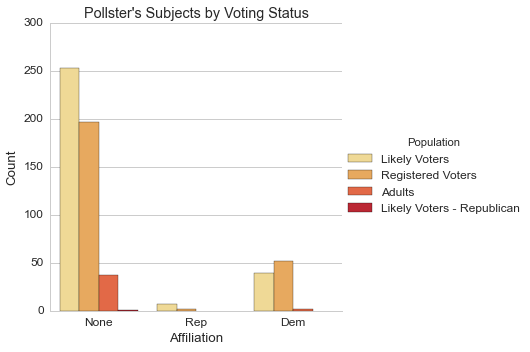

In [8]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
ax = sns.factorplot('Affiliation', data=poll_df, hue='Population', kind='count', size=5, palette='YlOrRd')
ax.set(xlabel='Affiliation', ylabel='Count', title='Pollster\'s Subjects by Voting Status')

More likely voters are polled than registered voters. N.B. a 'likely voter' is a registered voter who is determined to be likely to vote, this suggests that 'registered voters' are ones who are deemed unlikely to vote. 'Adults' are unregistered, therefore very unlikely to vote.

http://spotlight.ipsos-na.com/index.php/news/a-rv-lv-population-effects-in-public-opinion-polling/

http://www.gallup.com/poll/110287/what-difference-between-registered-voters-likely-voters.aspx

In [9]:
# Average poll result for each candidate
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations', axis=0, inplace=True)

In [10]:
avg

,0
Obama,46.774576
Romney,44.572881
Undecided,6.546099


In [11]:
# Standard deviation for each candidate
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)

In [12]:
std

,0
Obama,2.447069
Romney,2.925320
Undecided,3.698614


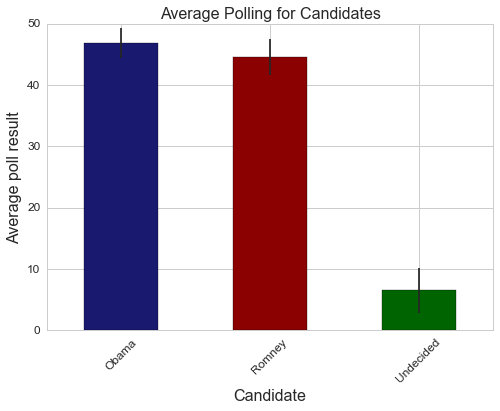

In [13]:
ax = avg.plot(yerr=std, kind='bar', legend=False, color=['midnightblue', 'darkred', 'darkgreen'])
ax.set_ylabel('Average poll result', fontsize=16)
ax.set_xlabel('Candidate', fontsize=16)
ax.set_title('Average Polling for Candidates', fontsize=16)
ax.set_xticklabels(avg.index, rotation=45)

On average, during the entire polling period Obama was ahead of Romney, although we can see it fluctuated with Romney getting some better polls than Obama.

In [14]:
poll_avg = pd.concat([avg, std], axis=1)

In [15]:
poll_avg.columns= ['Ave', 'Std']
poll_avg

,Ave,Std
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614


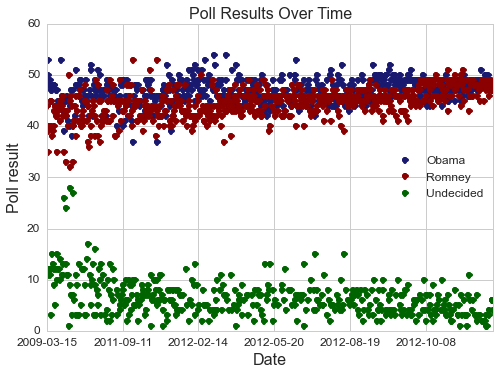

In [16]:
ax = poll_df.sort('End Date').plot(x='End Date', y=['Obama', 'Romney', 'Undecided'], linestyle='', marker='o',
                                  color=['midnightblue', 'darkred', 'darkgreen'])
ax.set_ylabel('Poll result', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('Poll Results Over Time', fontsize=16)

Seems as if Obama has an advantage throughout most of the campaign, though the results seem to converge towards the end.

In [17]:
poll_df['Difference'] = poll_df.Obama - poll_df.Romney
# The explicit gap between the candidates

In [18]:
poll_df_gbDate = poll_df.groupby('Start Date', as_index=False).mean()
# Keeps integer index

In [19]:
poll_df_gbDate.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403,44,44,12,0
1,2009-04-17,686,50,39,11,11
2,2009-05-14,1000,53,35,12,18
3,2009-06-12,638,48,40,12,8
4,2009-07-15,577,49,40,11,9


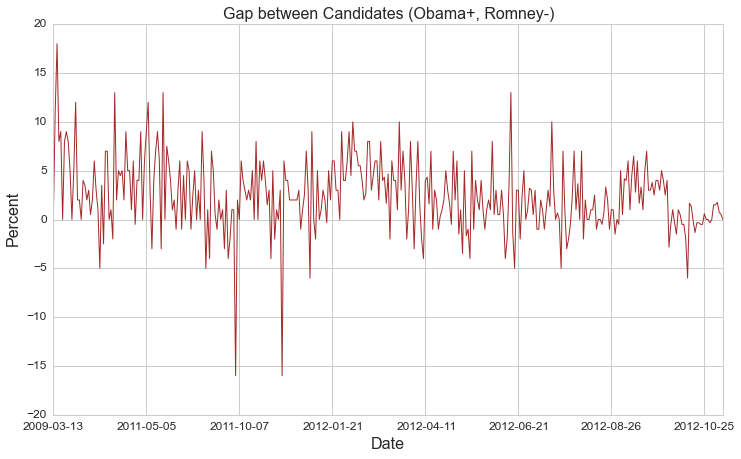

In [20]:
ax = poll_df_gbDate.sort('Start Date').plot('Start Date', 'Difference', figsize=(12, 7), linewidth=1, marker='x',
                                       color='brown', legend=False)
ax.set_ylabel('Percent', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('Gap between Candidates (Obama+, Romney-)', fontsize=16)

This confirms what we saw in the last graph, namely that Obama was predominantly ahead. There were two dates around late 2011 when Romney polled more than 15 points ahead, and towards the end the gap seemed to fluctuate narrowly around zero.

In [21]:
from datetime import datetime
poll_df_gbDate['St. Dat. (DT)'] = pd.to_datetime(poll_df_gbDate['Start Date'])
# Difficulty plotting datetime column
poll_df_gbDate['Start Date'] = poll_df_gbDate['Start Date'].dropna()
mask1 = poll_df_gbDate[poll_df_gbDate['St. Dat. (DT)'] > datetime(2012,9,30)]
mask2 = mask1[mask1 < datetime(2012, 11, 1)]
mask2 = mask2.dropna()
mask2.index[0], mask2.index[len(mask2)-1]
# Finding the indices of the start and end of October 2012

(329, 356)

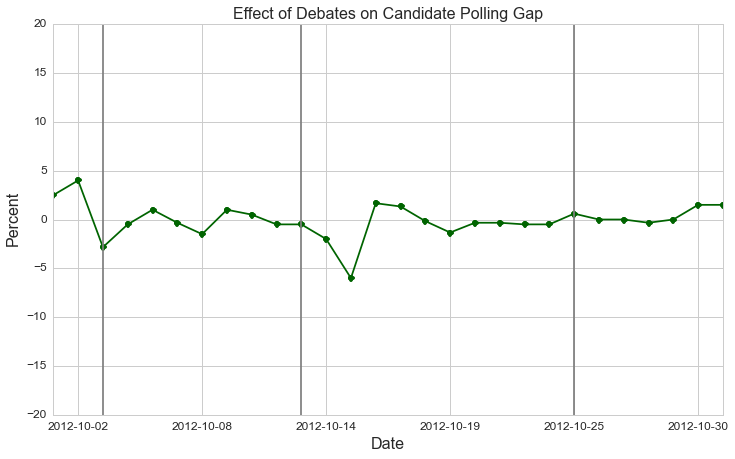

In [22]:
# Examining the 3 debates in October 2012
ax = poll_df_gbDate.plot('Start Date', 'Difference', xlim=(329, 356), marker='o', figsize=(12,7), 
                                      linestyle='-', color='darkgreen', legend=False)
# Oct 3rd
plt.axvline(x = 329 + 2, color='grey')
# Oct 11th
plt.axvline(x = 329 + 10, color='grey')
# Oct 22nd
plt.axvline(x = 329 + 21, color='grey')
ax.set_ylabel('Percent', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('Effect of Debates on Candidate Polling Gap', fontsize=16)

After the first debate Obama's rating increased, after the second it decreased and the third had only a very small effect. 

## Donor Analysis

In [23]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

/Users/ryanshiz/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [24]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [25]:
donor_mean = donor_df['contb_receipt_amt'].mean()

donor_std = donor_df['contb_receipt_amt'].std()

print 'Mean amount donated: $%.2f Standard deviation: $%.2f' % (donor_mean, donor_std)

Mean amount donated: $298.24 Standard deviation: $3749.67


The standard deviation is huge here, the reason for this is that refunds are counted in the data, we should eliminate them to get a more relevant set of data

In [26]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor = top_donor[top_donor > 0]

top_donor.sort(ascending=False)

top_donor.head(10)

325136    2014490.51
326651    1944042.43
344539    1679114.65
344419    1511192.17
319478     526246.17
335187     512710.91
257270     451726.00
114754      33300.00
217891      25800.00
823345      25000.00
Name: contb_receipt_amt, dtype: float64

The highest contributions made are in the millions.

In [27]:
donor_mean = top_donor.mean()

donor_std = top_donor.std()

print 'Mean amount donated: $%.2f Standard deviation: $%.2f' % (donor_mean, donor_std)

Mean amount donated: $312.19 Standard deviation: $3764.48


Removing refunds has not actually changed the values much! This indicates that the distribtion is skewed by large donations.

In [65]:
N = len(donor_df)
df = donor_df[donor_df['contb_receipt_amt'] > 1000]
M = len(df['contb_receipt_amt'])
print " Out of %d total donations, %d are above $1000 (%.1f percent)" % (N, M, M/N*100)

 Out of 1001731 total donations, 63376 are above $1000 (6.3 percent)


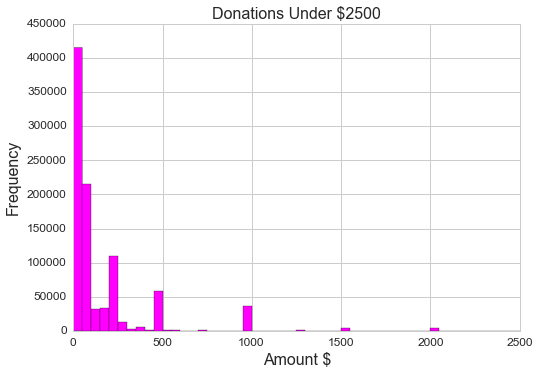

In [28]:
vc_donor = top_donor
vc_donor = vc_donor[vc_donor < 2500]
ax = vc_donor.hist(bins=50, color='magenta')
ax.set_ylabel('Frequency', fontsize=16)
ax.set_xlabel('Amount $', fontsize=16)
ax.set_title('Donations Under $2500', fontsize=16)

We can see that most donations are under $50, and that round numbers are preferred (250, 500, 1000 etc)

In [29]:
candidates = donor_df['cand_nm'].unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [30]:
cand_aff = ['Republican','Republican','Democrat','Republican','Republican','Republican','Republican','Republican','Republican','Republican',
           'Republican','Republican']

candidate_map = dict(zip(candidates, cand_aff))
# Creates a map of affiliation to candidate

In [31]:
donor_df['party'] = donor_df['cand_nm'].map(candidate_map)

In [32]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [33]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count().reset_index().sort(columns='contb_receipt_amt',
                                                                           ascending=False)

,cand_nm,contb_receipt_amt
6,"Obama, Barack",593746
7,"Paul, Ron",143757
11,"Romney, Mitt",107229
2,"Gingrich, Newt",47679
12,"Santorum, Rick",46559
1,"Cain, Herman",20107
9,"Perry, Rick",13575
0,"Bachmann, Michelle",13140
10,"Roemer, Charles E. 'Buddy' III",5920
8,"Pawlenty, Timothy",4555


Obama was the candidate with most donations (he was the only democrat running). Surprising though, is the fact that Ron Paul received more than Mitt Romney.

In [34]:
cand_tot = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()/1000000
cand_tot.reset_index().sort(columns='contb_receipt_amt',ascending=False)

,cand_nm,contb_receipt_amt
6,"Obama, Barack",133.502591
11,"Romney, Mitt",85.219249
7,"Paul, Ron",20.722567
9,"Perry, Rick",18.411512
2,"Gingrich, Newt",12.011832
12,"Santorum, Rick",10.728090
1,"Cain, Herman",7.047265
8,"Pawlenty, Timothy",4.255054
3,"Huntsman, Jon",3.204350
0,"Bachmann, Michelle",2.677435


Candidates with the most net dollars donated (in millions). Now we can see that Romney received far more dollars than the rest of the candidates. This suggests that Ron Paul is more popular with working-class Americans, but Romney was popular with the wealthy republican donors.  

In [35]:
i=0
for amt in cand_tot :
    print '%s raised %.2f million dollars' % (cand_tot.index[i], amt)
    i += 1

Bachmann, Michelle raised 2.68 million dollars
Cain, Herman raised 7.05 million dollars
Gingrich, Newt raised 12.01 million dollars
Huntsman, Jon raised 3.20 million dollars
Johnson, Gary Earl raised 0.57 million dollars
McCotter, Thaddeus G raised 0.04 million dollars
Obama, Barack raised 133.50 million dollars
Paul, Ron raised 20.72 million dollars
Pawlenty, Timothy raised 4.26 million dollars
Perry, Rick raised 18.41 million dollars
Roemer, Charles E. 'Buddy' III raised 0.37 million dollars
Romney, Mitt raised 85.22 million dollars
Santorum, Rick raised 10.73 million dollars


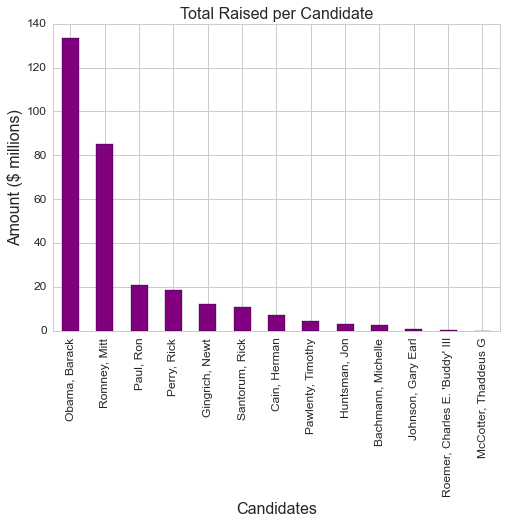

In [36]:
cand_tot.sort(ascending=False)
ax = cand_tot.plot(kind='bar', color='purple')
ax.set_ylabel('Amount ($ millions)', fontsize=16)
ax.set_xlabel('Candidates', fontsize=16)
ax.set_title('Total Raised per Candidate', fontsize=16)

We can see clearly the disparity between Romney and the rest of the candidates.

[<matplotlib.text.Text at 0x11164ed10>, <matplotlib.text.Text at 0x111641810>]

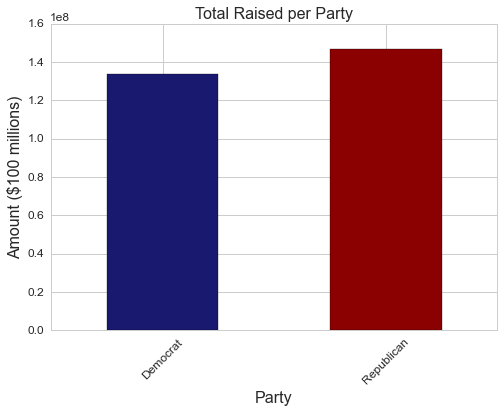

In [37]:
ax = donor_df.groupby('party')['contb_receipt_amt'].sum().plot(kind='bar', color=['midnightblue', 'darkred'])
ax.set_ylabel('Amount ($100 millions)', fontsize=16)
ax.set_xlabel('Party', fontsize=16)
ax.set_title('Total Raised per Party', fontsize=16)
ax.set_xticklabels(['Democrat', 'Republican'], rotation=45)

The republicans raised more cash overall, but it was distributed between more candidates.

In [38]:
occupation_df = pd.pivot_table(donor_df, index='contbr_occupation', columns='party', values='contb_receipt_amt',
                              aggfunc=sum)
# Creates new dataframe with occupation as index, parties as columns and amounts donated as values.

In [39]:
occupation_df.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100,NaN
AREA VICE PRESIDENT,250,NaN
RESEARCH ASSOCIATE,100,NaN
TEACHER,500,NaN
THERAPIST,3900,NaN


In [40]:
occupation_df.shape
# Too many occupations to plot, need to find the most relevant ones

(44355, 2)

In [41]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [42]:
occupation_df.shape

(29, 2)

In [43]:
occupation_df = occupation_df.drop(['INFORMATION REQUESTED', 'INFORMATION REQUESTED PER BEST EFFORTS'])
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df = occupation_df.drop(['C.E.O.'])
# Drop N/A rows and combine 'CEO' and 'C.E.O' rows

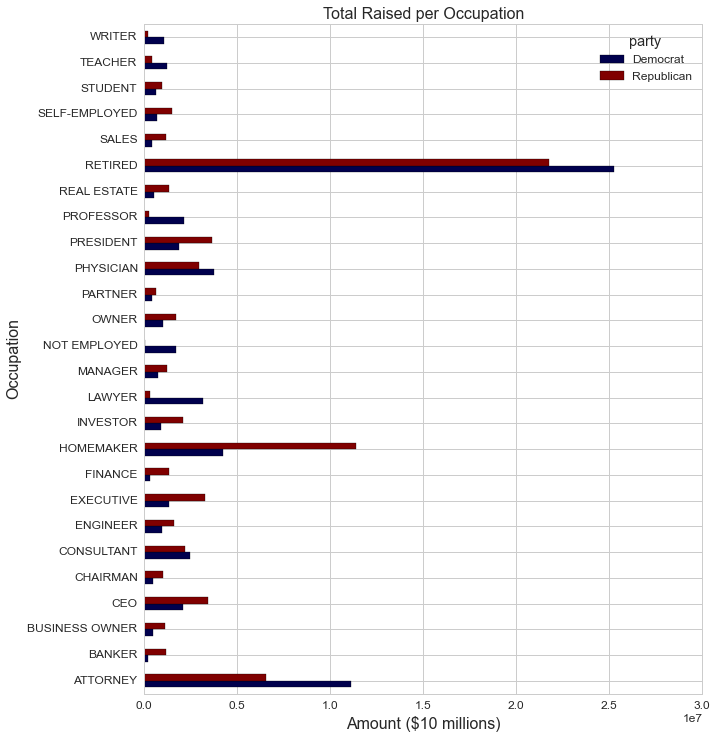

In [44]:
ax = occupation_df.plot(kind='barh', figsize=(10, 12),cmap='seismic')
ax.set_ylabel('Occupation', fontsize=16)
ax.set_xlabel('Amount ($10 millions)', fontsize=16)
ax.set_title('Total Raised per Occupation', fontsize=16)

The top 26 occupations by donations in the USA (occupations which gave over 1 million dollars net). The top 3 are retired, homemakers and attorneys. Retirees and homemakers are perhaps not surprising given the large numbers, and both lean in different directions - retirees gave more to democrats and homemakers favoured the republicans. Attorneys are very effective at raising money, and many US senators were previously lawyers.

In [45]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [46]:
state_df = pd.pivot_table(donor_df, index='contbr_st', columns='party', values='contb_receipt_amt', aggfunc=np.sum)

In [47]:
state_df.fillna(0, inplace=True)

In [48]:
state_df['Net'] = state_df['Democrat'] - state_df['Republican']

In [49]:
head_df = state_df.sort(columns='Net', ascending=False).head()
# 5 top democrat states

tail_df = state_df.sort(columns='Net', ascending=False).tail()
# 5 top republican states

In [50]:
top_states = pd.concat([head_df, tail_df])

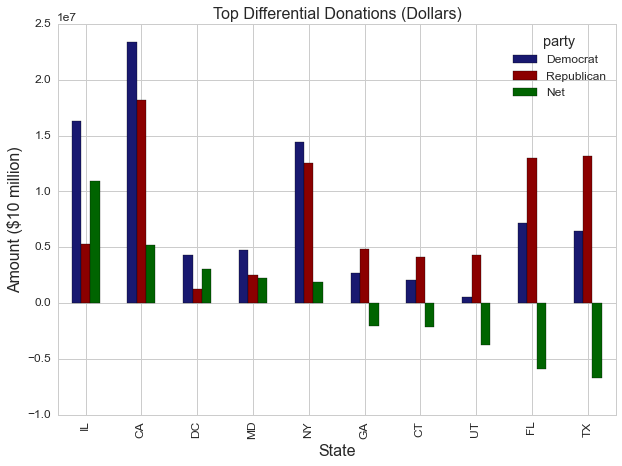

In [51]:
ax = top_states.plot(kind='bar', figsize=(10, 7), color=['midnightblue', 'darkred', 'darkgreen'])
ax.set_ylabel('Amount ($10 million)', fontsize=16)
ax.set_xlabel('State', fontsize=16)
ax.set_title('Top Differential Donations (Dollars)', fontsize=16)

This graph shows the top five democrat states and the top five republican states for differential donations. This is an attempt to show the most politically polarised states. Illinois is the most polarised towards democrats, but California gives more overall. Florida, Texas and Utah are all very skewed toward republican donations, but Florida and Texas donate more than twice as much overall.

In [52]:
state_cnt_df = pd.pivot_table(donor_df, index='contbr_st', columns='party', values='contb_receipt_amt',
                              aggfunc=lambda x: len(x))
state_cnt_df.fillna(0, inplace=True)
state_cnt_df['Net'] = state_cnt_df['Democrat'] - state_cnt_df['Republican']

In [53]:
state_cnt_df.head()

party,Democrat,Republican,Net
contbr_st,,,
AA,78,9,69
AB,4,0,4
AE,395,396,-1
AF,0,7,-7
AK,2046,1679,367


In [54]:
head_df = state_cnt_df.sort(columns='Net', ascending=False).head()
# 5 top democrat states

tail_df = state_cnt_df.sort(columns='Net', ascending=False).tail()
# 5 top republican states

top_cnt_states = pd.concat([head_df, tail_df])

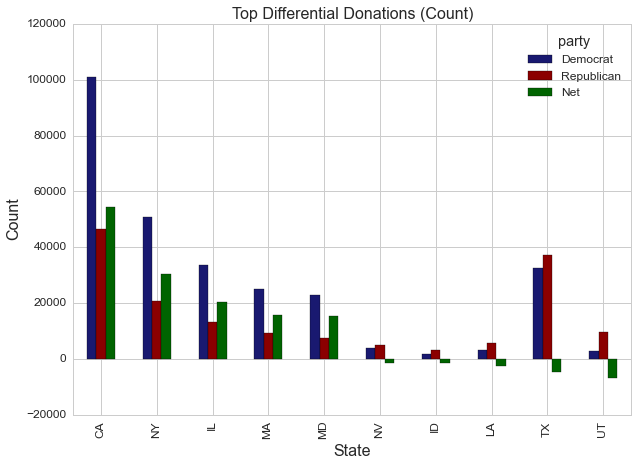

In [55]:
ax = top_cnt_states.plot(kind='bar', figsize=(10, 7), color=['midnightblue', 'darkred', 'darkgreen'])
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('State', fontsize=16)
ax.set_title('Top Differential Donations (Count)', fontsize=16)

This graph shows the differential donations by count (for the top 5 dem. and rep. states). A few things stand out from the graph. Firstly, there are many more democrat donators than republican (N.B. this is just 10 states), a possible conclusion is that republicans are generally more affluent (they raised more in total than the democrats). Also, the number of republican voters in the top 5 is much lower than the number of republicans in the democrat-leaning states. This is perhaps due to the fact that these states are more populous. We see that Florida has disappeared, this could be due to large donations from a few rich people. Texas too, has a closer number of donations between the parties than the previous graph would suggest.